# Polaczenie Oficialnych wynikow z wszystkich lat


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


def combine_years(where):
    path = where
    files = os.listdir(path)

    combined_years_df = pd.concat(
        [pd.read_csv(f'{path}/{file}') for file in files if file.endswith('.csv')], ignore_index=True)

    return combined_years_df


df = combine_years('../db/wta')
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,65402.000000,6.540200e+04,65402.000000,65402.000000,60786.000000,65391.000000,65402.000000,57753.000000,65388.000000,65402.000000,...,40852.000000,40852.000000,40852.000000,21007.000000,40850.000000,40850.000000,63575.000000,63575.000000,62286.000000,62286.000000
mean,55.621602,2.011058e+07,97.113131,202820.306933,173.540059,24.389512,203154.128559,172.816789,24.316003,3.002355,...,43.602712,25.122050,10.967688,10.322416,4.915667,9.954027,77.528730,1585.152497,105.695758,1051.605064
std,41.460605,6.850017e+04,171.069755,4363.006141,6.635567,4.100003,4717.538034,6.546236,4.263010,0.068585,...,16.247037,10.834857,5.415292,3.294658,3.152767,3.905101,117.442518,1681.498732,139.595615,1139.775659
min,2.000000,2.000010e+07,1.000000,200001.000000,152.000000,14.000000,200001.000000,152.000000,14.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,2.005052e+07,10.000000,201286.000000,170.000000,21.300000,201305.000000,168.000000,21.100000,3.000000,...,32.000000,17.000000,7.000000,8.000000,3.000000,7.000000,18.000000,538.000000,35.000000,393.000000
50%,32.000000,2.011042e+07,27.000000,201465.000000,174.000000,24.200000,201492.000000,173.000000,24.100000,3.000000,...,41.000000,24.000000,10.000000,10.000000,4.000000,10.000000,45.000000,1008.000000,68.000000,724.000000
75%,96.000000,2.017032e+07,163.000000,201847.000000,178.000000,27.200000,202450.000000,177.000000,27.200000,3.000000,...,53.000000,32.000000,14.000000,13.000000,7.000000,12.000000,88.000000,1968.000000,115.000000,1241.000000
max,128.000000,2.023083e+07,2701.000000,263853.000000,190.000000,47.600000,263852.000000,190.000000,48.600000,5.000000,...,774.000000,369.000000,74.000000,24.000000,81.000000,180.000000,1503.000000,13615.000000,1556.000000,13615.000000


In [2]:
df.shape

(65402, 49)

In [3]:
match_stats = ['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
               'tourney_date', 'match_num', 'score', 'best_of', 'round', 'minutes']

winner_stats = ['winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
                'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'w_SvGms']

loser_stats = ['loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
               'loser_rank', 'loser_rank_points', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']

In [4]:
nulls_summary = pd.DataFrame(df[match_stats].isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100), 2)
# nulls_summary.sort_values(
#     by=['Num_of_nulls [qty]'], ascending=False, inplace=True)
print(nulls_summary)

               Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
tourney_id     False                   0              0.00
tourney_name   False                   0              0.00
surface         True                  20              0.03
draw_size      False                   0              0.00
tourney_level  False                   0              0.00
tourney_date   False                   0              0.00
match_num      False                   0              0.00
score          False                   0              0.00
best_of        False                   0              0.00
round          False                   0              0.00
minutes         True               46275             70.75


In [5]:
df = df[df['best_of'] == 3]

In [6]:
# df.head()

In [7]:
# nulls_summary = pd.DataFrame(
#     df[winner_stats].isnull().any(), columns=['Nulls'])
# nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
# nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100), 2)
# # nulls_summary.sort_values(
# #     by=['Num_of_nulls [qty]'], ascending=False, inplace=True)
# print(nulls_summary)

In [8]:
# nulls_summary = pd.DataFrame(df[loser_stats].isnull().any(), columns=['Nulls'])
# nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
# nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100), 2)
# # nulls_summary.sort_values(
# #     by=['Num_of_nulls [qty]'], ascending=False, inplace=True)
# print(nulls_summary)

In [9]:
# l_columns = [col for col in df.columns if col.startswith(('l_', 'loser_'))]
# w_columns = [col for col in df.columns if col.startswith(('w_', 'winner_'))]

# # Get columns with the specified prefixes including "winner_" and "loser_"
# l_columns = [col for col in df.columns if col.startswith(('l_', 'loser_'))]
# w_columns = [col for col in df.columns if col.startswith(('w_', 'winner_'))]

# # Get the corresponding columns for both prefixes, considering both "w_" and "winner_" (and for "l_" and "loser_")
# common_suffixes = set(col.split('_')[1] for col in l_columns) & set(
#     col.split('_')[1] for col in w_columns)
# corresponding_columns = [(next(col for col in l_columns if col.endswith(suffix)), next(
#     col for col in w_columns if col.endswith(suffix))) for suffix in common_suffixes]

# # Calculate the number of missing values for each column
# missing_values = {}
# for l_col, w_col in corresponding_columns:
#     missing_values[l_col] = df[l_col].isna().sum()
#     missing_values[w_col] = df[w_col].isna().sum()

# # Calculate the percentage of missing values for each column
# total_rows = len(df)
# missing_values_percentage = {
#     col: (missing / total_rows) * 100 for col, missing in missing_values.items()}

# # Adding the total percentage of missing values for "winner" and "loser" prefixes
# total_winner_missing = df[w_columns].isna(
# ).sum().sum() / (len(df) * len(w_columns)) * 100
# total_loser_missing = df[l_columns].isna().sum(
# ).sum() / (len(df) * len(l_columns)) * 100

# # Adding total percentage values to the dictionary
# missing_values_percentage['total_winner'] = total_winner_missing
# missing_values_percentage['total_loser'] = total_loser_missing

# # Plotting the histogram with a 90-degree rotation and percentages
# plt.figure(figsize=(10, 8))

# # Plotting the bar chart horizontally
# x = range(len(missing_values_percentage))
# plt.barh(range(len(missing_values_percentage)), missing_values_percentage.values(
# ), color=['red', 'blue'] * (len(corresponding_columns)) + ['grey', 'grey'])

# # Labeling the axes and title
# plt.xlabel('Percentage of Missing Values (%)')
# plt.ylabel('Columns')
# plt.title('Missing Values for Corresponding Columns (in Percentage)')
# plt.yticks(range(len(missing_values_percentage)),
#            missing_values_percentage.keys())

# # Display the plot
# plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)
# plt.show()

In [10]:
df[['winner_rank', 'loser_rank']] = df[[
    'winner_rank', 'loser_rank']].fillna(2500)

df[['winner_rank_points', 'loser_rank_points']] = df[[
    'winner_rank_points', 'loser_rank_points']].fillna(1)

# df[['winner_entry', 'loser_entry']] = df[[
#     'winner_entry', 'loser_entry']].fillna('NN')


# df['winner_seed'] = pd.to_numeric(
#     df['winner_seed'], errors='coerce').fillna(128).astype(int)
# df['loser_seed'] = pd.to_numeric(
#     df['loser_seed'], errors='coerce').fillna(128).astype(int)
# df[['winner_seed', 'loser_seed']] = df[[
#     'winner_seed', 'loser_seed']].fillna(128)

In [11]:

# # Initial counts of missing values
# initial_loser_ht_missing = df['loser_ht'].isnull().sum()
# initial_winner_ht_missing = df['winner_ht'].isnull().sum()

# # Finding missing loser_ht values that can be filled using winner_ht values
# losers_potentially_fillable = df[df['loser_ht'].isnull(
# ) & df['loser_id'].isin(df['winner_id'])]

# # Finding missing winner_ht values that can be filled using loser_ht values
# winners_potentially_fillable = df[df['winner_ht'].isnull(
# ) & df['winner_id'].isin(df['loser_id'])]

# # Filling missing loser_ht values using available winner_ht values
# for idx, row in losers_potentially_fillable.iterrows():
#     matching_winner_ht = df[(df['winner_id'] == row['loser_id']) & (
#         ~df['winner_ht'].isnull())]['winner_ht']
#     if not matching_winner_ht.empty:
#         df.at[idx, 'loser_ht'] = matching_winner_ht.iloc[0]

# # Filling missing winner_ht values using available loser_ht values
# for idx, row in winners_potentially_fillable.iterrows():
#     matching_loser_ht = df[(df['loser_id'] == row['winner_id']) & (
#         ~df['loser_ht'].isnull())]['loser_ht']
#     if not matching_loser_ht.empty:
#         df.at[idx, 'winner_ht'] = matching_loser_ht.iloc[0]

# # Checking the number of missing values after imputation
# final_loser_ht_missing = df['loser_ht'].isnull().sum()
# final_winner_ht_missing = df['winner_ht'].isnull().sum()

# print(final_loser_ht_missing, final_winner_ht_missing)

In [12]:
df.dropna(subset=['loser_ht', 'winner_ht',
          'loser_age', 'winner_age'], inplace=True)

In [13]:
def replace_missing_svgms_with_estimate(df):
    def parse_score(score):
        try:
            sets = score.split()
            games_winner = 0
            games_loser = 0

            for s in sets:
                if "(" in s:  # Exclude the tiebreak score
                    s = s.split("(")[0]
                if "-" in s:
                    w, l = s.split("-")
                    games_winner += int(w)
                    games_loser += int(l)

            return games_winner, games_loser
        except:
            return None, None

    # Apply the parse_score function to the score column
    df['games_winner'], df['games_loser'] = zip(
        *df['score'].apply(parse_score))

    # Estimate the service games (SvGms) for the winner and loser
    df['estimated_w_SvGms'] = (df['games_winner'] + df['games_loser'] + 1) // 2
    df['estimated_l_SvGms'] = (df['games_winner'] + df['games_loser']) // 2

    # Replace missing values in the original SvGms columns with the estimated values
    df['w_SvGms'].fillna(df['estimated_w_SvGms'], inplace=True)
    df['l_SvGms'].fillna(df['estimated_l_SvGms'], inplace=True)

    # Drop the temporary columns used for the estimation
    df.drop(columns=['games_winner', 'games_loser',
            'estimated_w_SvGms', 'estimated_l_SvGms'], inplace=True)

    return df


df = replace_missing_svgms_with_estimate(df)

In [14]:
df.dropna(subset=['w_ace', 'w_df', 'l_ace', 'l_df'], inplace=True)

In [15]:
df.drop(columns=['minutes'], inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


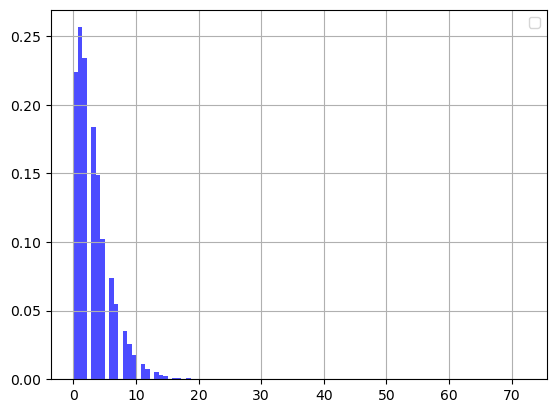

In [16]:
plt.hist(df['w_ace'], 100, density=True,
         stacked=True, facecolor='blue', alpha=0.7)

plt.legend()
plt.grid()
plt.show()

In [17]:
df.dropna(subset=['winner_ht', 'loser_ht',
                  'winner_rank', 'loser_rank', 'l_ace', 'l_df', 'w_ace'], inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36792 entries, 9140 to 65189
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36792 non-null  object 
 1   tourney_name        36792 non-null  object 
 2   surface             36792 non-null  object 
 3   draw_size           36792 non-null  int64  
 4   tourney_level       36792 non-null  object 
 5   tourney_date        36792 non-null  int64  
 6   match_num           36792 non-null  int64  
 7   winner_id           36792 non-null  int64  
 8   winner_seed         17512 non-null  object 
 9   winner_entry        4880 non-null   object 
 10  winner_name         36792 non-null  object 
 11  winner_hand         36792 non-null  object 
 12  winner_ht           36792 non-null  float64
 13  winner_ioc          36792 non-null  object 
 14  winner_age          36792 non-null  float64
 15  loser_id            36792 non-null  int64  
 16  loser_

In [18]:
df = df[df['w_df'].notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36792 entries, 9140 to 65189
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          36792 non-null  object 
 1   tourney_name        36792 non-null  object 
 2   surface             36792 non-null  object 
 3   draw_size           36792 non-null  int64  
 4   tourney_level       36792 non-null  object 
 5   tourney_date        36792 non-null  int64  
 6   match_num           36792 non-null  int64  
 7   winner_id           36792 non-null  int64  
 8   winner_seed         17512 non-null  object 
 9   winner_entry        4880 non-null   object 
 10  winner_name         36792 non-null  object 
 11  winner_hand         36792 non-null  object 
 12  winner_ht           36792 non-null  float64
 13  winner_ioc          36792 non-null  object 
 14  winner_age          36792 non-null  float64
 15  loser_id            36792 non-null  int64  
 16  loser_

In [19]:
from exploration_plots import plot_exploration

# without_clutter = df.drop(
#     ['tourney_name', 'winner_name', 'loser_name', 'tourney_date'], axis=1)


# plot_exploration(without_clutter)

In [20]:
# plot_exploration(df[['winner_ht']])

Dodanie indexu w celu indexowania meczy


In [21]:
# plt.hist(df['winner_ht'], alpha=0.5, label='Winner Height')
# plt.hist(df['loser_ht'], alpha=0.5, label='Loser Height')

# plt.xlabel('Height (cm)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Heights')
# plt.legend(loc='upper right')

# plt.show()

In [22]:
# plt.hist(df['winner_age'], alpha=0.5, label='Winner Age')
# plt.hist(df['loser_age'], alpha=0.5, label='Loser Age')

# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Distribution of Age')
# plt.legend(loc='upper right')

# plt.show()

In [23]:
df['match_id'] = df.index + 1

In [24]:
# df.set_index('match_id', inplace=True)

In [25]:
# def rename_of_features(db):
#     """ Renames loser to P2 and Winner to P1   """

#     db.rename(columns={'tourney_date': 'date',
#                        'winner_name': 'P1_name',
#                        'winner_hand': 'P1_hand',
#                        'winner_ht': 'P1_height',
#                        'winner_age': 'P1_age',
#                        'winner_rank': 'P1_rank',
#                        'winner_rank_points': 'P1_rank_points',
#                        'loser_name': 'P2_name',
#                        'loser_hand': 'P2_hand',
#                        'loser_ht': 'P2_height',
#                        'loser_age': 'P2_age',
#                        'loser_rank': 'P2_rank',
#                        'loser_rank_points': 'P2_rank_points'}, inplace=True)


# rename_of_features(df)

In [26]:
df['tourney_level'] = df['tourney_level'].fillna('Unknown')
# all_years = pd.get_dummies(all_years, columns=['tourney_level'])

df['surface'] = df['surface'].fillna('Unknown')
# all_years = pd.get_dummies(all_years, columns=['surface'])

In [27]:
from features import result_scrambler

df = result_scrambler(df)

In [28]:
# categories = ['round']

# numerical = ['draw_size', 'P1_height', 'P1_age', 'P1_rank', 'P1_rank_points', 'P2_height', 'P2_age', 'P2_rank', 'P2_rank_points', 'w_ace', 'w_df',
#              'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
#              'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced']


# for cat in categories:
#     df[cat].replace(np.NaN, df[cat].mode()[0], inplace=True)


df.fillna(method='ffill', inplace=True)

C:\Users\march\AppData\Local\Temp\ipykernel_32376\1333702171.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [29]:
# df = pd.read_csv('../db/out/wta_std.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        36792 non-null  int64  
 1   date            36792 non-null  int64  
 2   surface         36792 non-null  object 
 3   tourney_level   36792 non-null  object 
 4   draw_size       36792 non-null  int64  
 5   y               36792 non-null  int64  
 6   name_P1         36792 non-null  object 
 7   hand_P1         36792 non-null  object 
 8   entry_P1        36782 non-null  object 
 9   seed_P1         36792 non-null  object 
 10  age_P1          36792 non-null  float64
 11  ht_P1           36792 non-null  float64
 12  ioc_P1          36792 non-null  object 
 13  rank_P1         36792 non-null  float64
 14  rank_points_P1  36792 non-null  float64
 15  ace_P1          36792 non-null  float64
 16  df_P1           36792 non-null  float64
 17  svpt_P1         36792 non-null 

In [31]:

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

df.describe()

,match_id,date,draw_size,y,age_P1,ht_P1,rank_P1,rank_points_P1,ace_P1,df_P1,...,rank_points_P2,ace_P2,df_P2,svpt_P2,1stIn_P2,1stWon_P2,2ndWon_P2,SvGms_P2,bpSaved_P2,bpFaced_P2
count,36792.000000,36792,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,...,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000,36792.000000
mean,41512.009323,2014-07-20 22:01:05.753424640,66.281556,0.503805,25.111212,173.842846,72.196184,1609.240541,2.569798,3.599098,...,1600.662943,2.577055,3.588851,70.212356,43.755409,27.517640,11.989101,10.524109,4.458225,8.223935
min,9141.000000,2003-04-26 00:00:00,2.000000,0.000000,14.100000,153.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30274.750000,2010-05-15 06:00:00,32.000000,0.000000,22.000000,170.000000,21.000000,643.000000,1.000000,2.000000,...,634.000000,1.000000,2.000000,53.000000,32.000000,20.000000,8.000000,8.000000,2.000000,5.000000
50%,42260.500000,2014-09-08 00:00:00,56.000000,1.000000,24.900000,174.000000,49.000000,1067.000000,2.000000,3.000000,...,1055.000000,2.000000,3.000000,67.000000,41.000000,26.000000,11.000000,10.000000,4.000000,8.000000
75%,53134.250000,2018-08-20 00:00:00,128.000000,1.000000,27.800000,179.000000,88.000000,1940.000000,4.000000,5.000000,...,1915.000000,4.000000,5.000000,85.000000,53.000000,34.000000,15.000000,13.000000,6.000000,11.000000
max,65190.000000,2023-08-28 00:00:00,128.000000,1.000000,47.600000,190.000000,2500.000000,13260.000000,72.000000,72.000000,...,13615.000000,40.000000,36.000000,972.000000,774.000000,369.000000,56.000000,26.000000,81.000000,180.000000
std,13883.366947,NaN,41.130301,0.499992,4.098303,6.529455,131.064766,1608.458678,2.710572,2.692390,...,1610.430121,2.673318,2.666803,23.082686,16.083841,10.386673,5.332979,3.172141,3.186730,4.520905


# Rankingi ELO i GLICKO xxx test


In [32]:
from rating_elo import update_elo


players = pd.concat([df['name_P1'], df['name_P2']]).unique()
ratings = {player: 1500 for player in players}


df['elo_P1'] = np.nan
df['elo_P2'] = np.nan


for id, match in df.iterrows():
    player1 = match['name_P1']
    player2 = match['name_P2']
    player1_rating = ratings[player1]
    player2_rating = ratings[player2]
    df.at[id, 'elo_P1'] = player1_rating
    df.at[id, 'elo_P2'] = player2_rating
    ratings[player1], ratings[player2] = update_elo(
        player1_rating, player1_rating, match['y'])

In [33]:
from rating_glicko import update_glicko

DEFAULT_RD = 350


ratings_glico = {player: 1500 for player in players}

RDs = {player: DEFAULT_RD for player in players}

volatility = {player: 0.06 for player in players}


df['glicko_P1'] = np.nan
df['glicko_P2'] = np.nan
df['RD_P1'] = np.nan
df['RD_P2'] = np.nan


for id, row in df.iterrows():
    p1 = row['name_P1']
    p2 = row['name_P2']

    # Get current ratings and RDs
    p1_current_rating = ratings_glico[p1]
    p2_current_rating = ratings_glico[p2]
    p1_current_RD = RDs[p1]
    p2_current_RD = RDs[p2]
    p1_current_volatility = volatility[p1]
    p2_current_volatility = volatility[p2]

    # Store current ratings and RDs
    df.loc[id, 'glicko_P1'] = p1_current_rating
    df.loc[id, 'glicko_P2'] = p2_current_rating
    df.loc[id, 'RD_P1'] = p1_current_RD
    df.loc[id, 'RD_P2'] = p2_current_RD

    # Update ratings and RDs based on match result (P1 is assumed to be the winner)
    p1_new_rating, p1_new_RD = update_glicko(
        p1_current_rating, p1_current_RD, p2_current_rating, p2_current_RD, 1)
    p2_new_rating, p2_new_RD, = update_glicko(
        p2_current_rating, p2_current_RD, p1_current_rating, p1_current_RD, 0)

    # Update the ratings and RDs dictionary
    ratings_glico[p1] = p1_new_rating
    RDs[p1] = p1_new_RD
    ratings_glico[p2] = p2_new_rating
    RDs[p2] = p2_new_RD

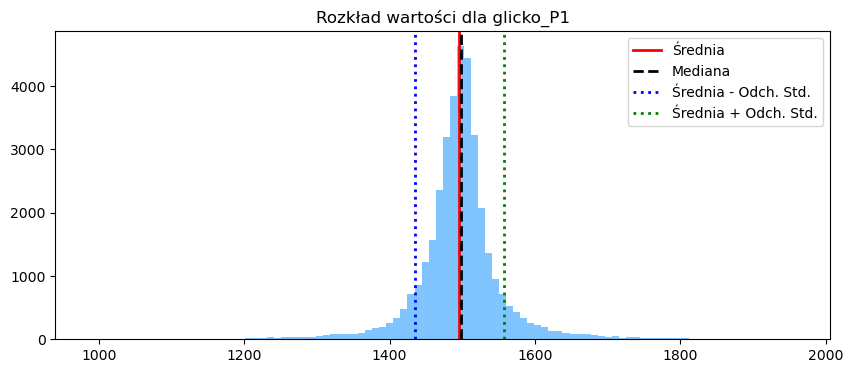

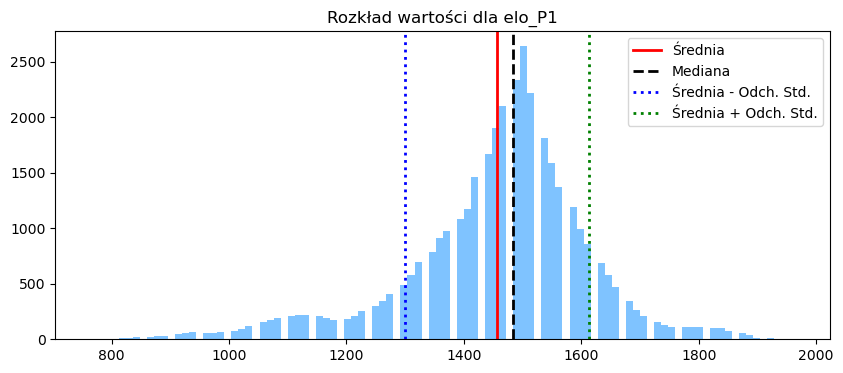

In [34]:
plot_exploration(df[['glicko_P1', 'elo_P1']])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36792 entries, 0 to 36791
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   match_id        36792 non-null  int64         
 1   date            36792 non-null  datetime64[ns]
 2   surface         36792 non-null  object        
 3   tourney_level   36792 non-null  object        
 4   draw_size       36792 non-null  int64         
 5   y               36792 non-null  int64         
 6   name_P1         36792 non-null  object        
 7   hand_P1         36792 non-null  object        
 8   entry_P1        36782 non-null  object        
 9   seed_P1         36792 non-null  object        
 10  age_P1          36792 non-null  float64       
 11  ht_P1           36792 non-null  float64       
 12  ioc_P1          36792 non-null  object        
 13  rank_P1         36792 non-null  float64       
 14  rank_points_P1  36792 non-null  float64       
 15  ac

In [36]:
df.to_csv('../db/out/wta_std.csv')

In [53]:
def plot_exploration(df):
    for column in df.columns:
        # For numeric columns, use a histogram
        if pd.api.types.is_numeric_dtype(df[column]):
            mean = df[column].mean()
            median = df[column].median()
            std = df[column].std()

            plt.figure(figsize=(10, 4))
            plt.hist(df[column], bins=100, alpha=0.5, color='#0088ff')
            plt.axvline(mean, color='red', linestyle='solid', linewidth=2, label='Średnia')
            plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label='Mediana')
            plt.axvline(mean - std, color='blue', linestyle='dotted', linewidth=2, label='Średnia - Odch. Std.')
            plt.axvline(mean + std, color='green', linestyle='dotted', linewidth=2, label='Średnia + Odch. Std.')
            plt.legend()
            plt.ylabel('Ilość punktów w rankingu')
            plt.xlabel('Ilość zawodniczek')
            plt.title(f'Rozkład wartości rankingu Glciko')
            plt.show()
        # For non-numeric columns, use a bar plot of value counts
        else:
            plt.figure(figsize=(10, 4))
            df[column].value_counts().plot(kind='bar')
            plt.title(f'Rozkład wartości dla {column}')
            plt.show()

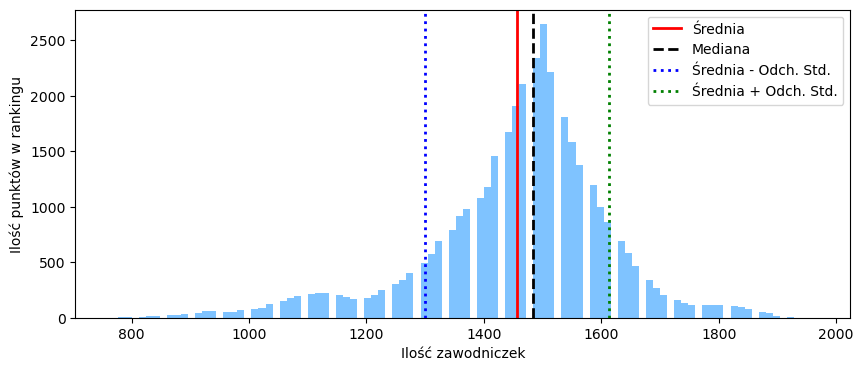

In [55]:
plot_exploration(df[['elo_P1']])